# Laboratorio 1 - Minería de Datos

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random

In [10]:
#importar csv
data = pd.read_csv('movies_2026.csv', encoding='latin-1')
pd.options.display.float_format = '{:,.0f}'.format

data.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0,Drama|Crime,NaN,NaN,NaN,NaN,0,95,False,...,2026-02-01,0,0,2,0,0,8,2,5,"2,026"
1,1626914,0,Animation,NaN,NaN,NaN,NaN,0,3,False,...,2026-02-01,0,0,1,0,0,4,0,0,"2,026"
2,1626898,0,Animation,NaN,NaN,NaN,NaN,0,2,False,...,2026-02-01,0,0,1,0,0,3,0,0,"2,026"
3,1626808,0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0,5,False,...,2026-02-01,0,0,3,0,0,7,0,0,"2,026"
4,1626678,0,Animation,NaN,NaN,NaN,NaN,0,12,False,...,2026-02-01,0,0,1,0,0,3,0,0,"2,026"


1. Exploración rápida de sus datos

In [ ]:
#filas y columnas
data.shape


(19883, 28)

In [12]:
#vista general 
data.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0,Drama|Crime,NaN,NaN,NaN,NaN,0,95,False,...,2026-02-01,0,0,2,0,0,8,2,5,"2,026"
1,1626914,0,Animation,NaN,NaN,NaN,NaN,0,3,False,...,2026-02-01,0,0,1,0,0,4,0,0,"2,026"
2,1626898,0,Animation,NaN,NaN,NaN,NaN,0,2,False,...,2026-02-01,0,0,1,0,0,3,0,0,"2,026"
3,1626808,0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0,5,False,...,2026-02-01,0,0,3,0,0,7,0,0,"2,026"
4,1626678,0,Animation,NaN,NaN,NaN,NaN,0,12,False,...,2026-02-01,0,0,1,0,0,3,0,0,"2,026"


In [13]:
#info general
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharacter            17048 non-null  obj

In [ ]:
# Descripción general de los datos

data.describe()


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,"19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,846","19,721","19,881"
mean,"902,240","9,413,280","28,792,134",66,26,4,676,2,2,1,"1,082","3,517","8,224","2,017"
std,"684,898","27,747,812","110,980,475",50,156,3,"1,938",1,2,2,"26,403","47,769","71,258",13
min,5,0,0,0,0,0,0,0,0,0,0,0,0,"1,902"
25%,"146,220",0,0,10,0,0,0,1,0,1,3,0,0,"2,013"
50%,"869,623",0,0,86,9,5,6,2,1,1,9,2,3,"2,021"
75%,"1,589,602","1,000,000","330,634",103,22,7,423,3,3,1,21,6,12,"2,025"
max,"1,627,166","380,000,000","2,847,246,203",750,"11,475",10,"30,788",16,89,155,"919,590","922,162","922,017","2,026"


2. Tipo de cada una de las variables 

In [15]:
data.dtypes


id                             int64
budget                       float64
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                      float64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                      int64
genresAmount                   int64
productionCoAmount             int64
productionCountriesAmount      int64
actorsAmount                   int64
castWomenAmount              float64
castMenAmount                float64
r

3. Investigue si las variables cuantitativas siguen una distribución normal y haga una
tabla de frecuencias

4. Preguntas

4.1.  ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [15]:
top_10_budget = (
    data
    .dropna(subset=["budget"])
    .sort_values(by="budget", ascending=False)
    .head(10)
    [["title", "budget"]]
)

print(top_10_budget)

                                             title      budget
10606  Pirates of the Caribbean: On Stranger Tides 380,000,000
14600                      Avengers: Age of Ultron 365,000,000
15842                            Avengers: Endgame 356,000,000
5907                          Avatar: Fire and Ash 350,000,000
15843                       Avengers: Infinity War 300,000,000
14843                               Justice League 300,000,000
10053     Pirates of the Caribbean: At World's End 300,000,000
10497                             Superman Returns 270,000,000
17024                                The Lion King 260,000,000
13681                                      Tangled 260,000,000


4.2. ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [16]:
top_10_revenue = (
    data
    .dropna(subset=["revenue"])
    .sort_values(by="revenue", ascending=False)
    .head(10)
    [["title", "revenue"]]
)

print(top_10_revenue)

                              title       revenue
13100                        Avatar 2,847,246,203
15842             Avengers: Endgame 2,797,800,564
10197                       Titanic 2,187,463,944
14837  Star Wars: The Force Awakens 2,068,223,624
15843        Avengers: Infinity War 2,046,239,637
8481                     Zootopia 2 1,744,338,246
14804                Jurassic World 1,671,713,208
17024                 The Lion King 1,667,635,327
18937       Spider-Man: No Way Home 1,631,853,496
13287                  The Avengers 1,518,815,515


4.3. ¿Cuál es la película que más votos tuvo?

In [19]:
top_1_voted = (
    data
    .dropna(subset=["voteCount"])
    .sort_values(by="voteCount", ascending=False)
    .head(1)
    [["title", "voteCount"]]
)

top_1_avg_vote= (
    data
    .dropna(subset=["voteAvg"])
    .sort_values(by="voteAvg", ascending=False)
    .head(1)
    [["title", "voteAvg"]]
)

print(top_1_voted)

print(top_1_avg_vote)

           title  voteCount
13401  Inception      30788
                   title  voteAvg
1813  GravaÃ§Ã£o Maldita       10


4.4.  ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios? 

In [30]:
#se realiza una validación para ver que la película no tenga 0 votos,
#ya que si esta no ha sido evaluada no puede ser la peor película
#de esta manera busca eliminarse un sesgo

data_filtrada = data[
    (data["voteCount"] >= 50) &
    (data["voteAvg"].notna())
]

worst_movie = (
    data_filtrada
    .sort_values(by="voteAvg", ascending=True)
    .head(1)[["title", "voteAvg", "voteCount"]]
)

worst_movie


,title,voteAvg,voteCount
12656,Dragonball Evolution,3,1600


4.5.  ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras

     releaseYear  num_movies
0          1,902           1
1          1,920           1
2          1,921           1
3          1,922           1
4          1,925           2
..           ...         ...
96         2,020         531
97         2,021         814
98         2,022           7
99         2,025        7351
100        2,026        2537

[101 rows x 2 columns]


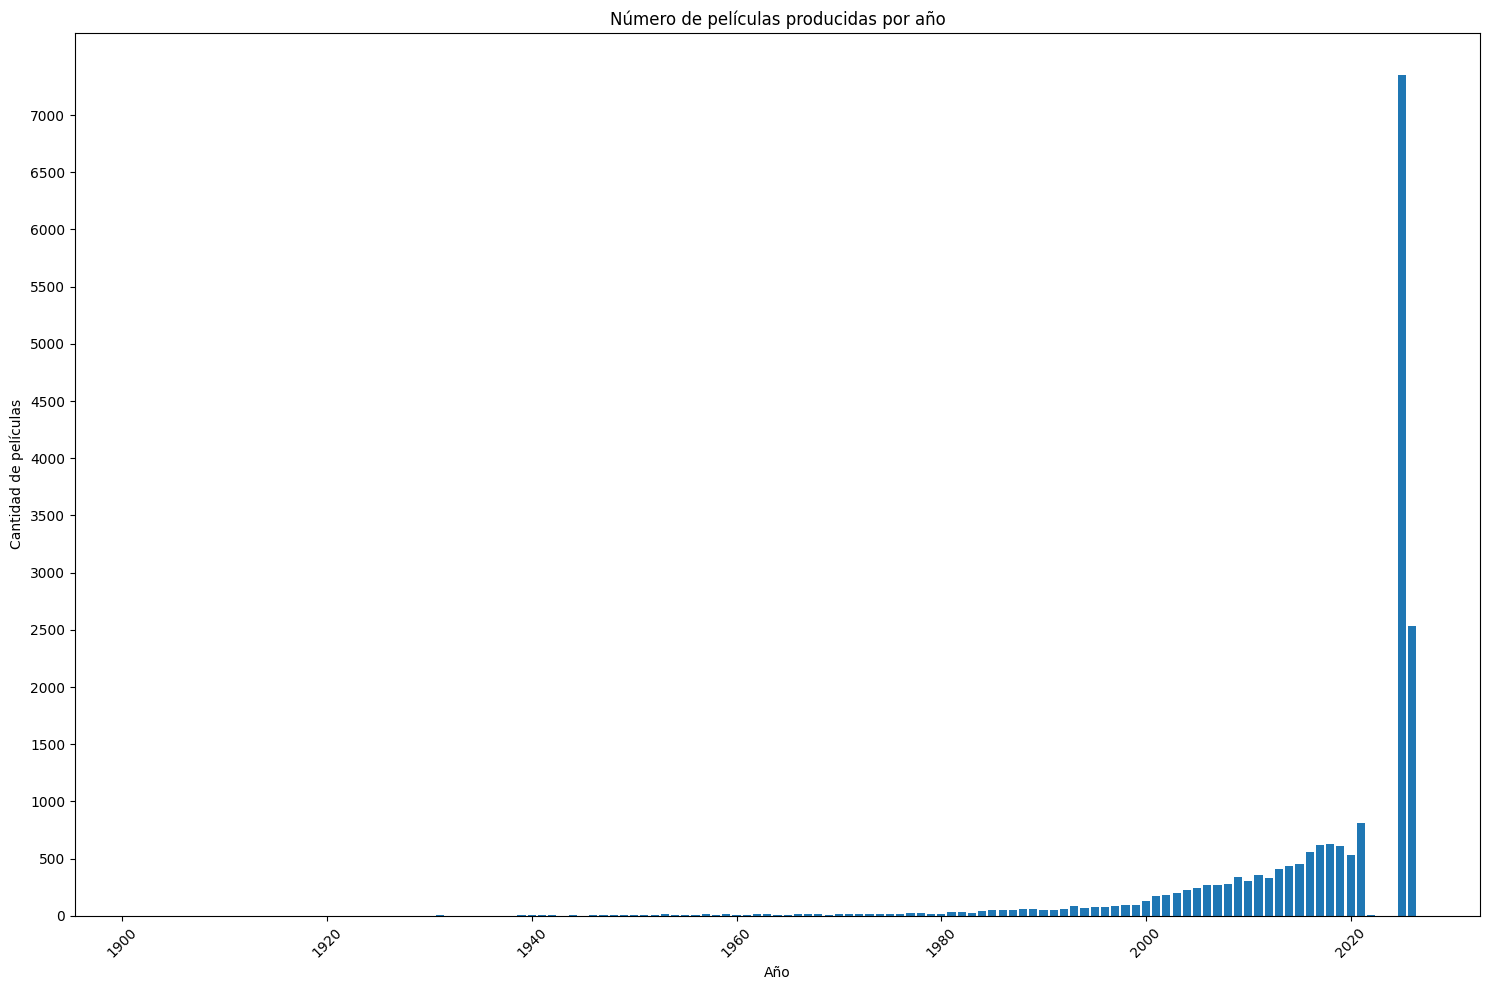

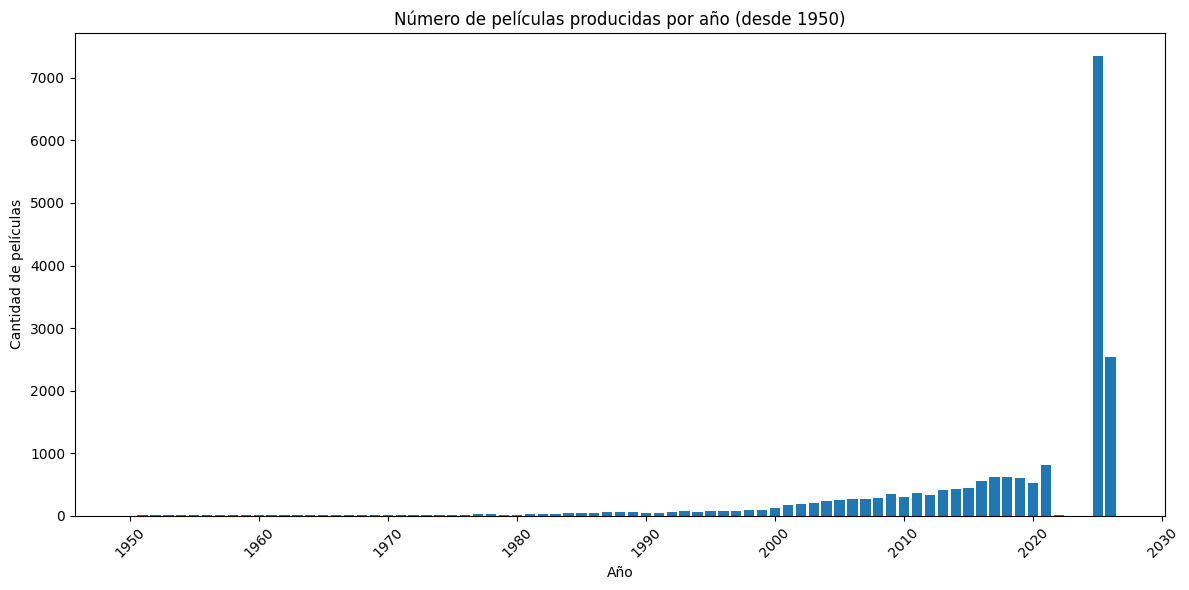

In [44]:
movies_per_year = (
    data
    .dropna(subset=["releaseYear"])
    .groupby("releaseYear")
    .size()
    .reset_index(name="num_movies")
)

print(movies_per_year)

year_most_movies = movies_per_year.loc[
    movies_per_year["num_movies"].idxmax()
]

year_most_movies

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.bar(
    movies_per_year["releaseYear"],
    movies_per_year["num_movies"]
)

plt.title("Número de películas producidas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)

plt.yticks(
    np.arange(
        0,
        movies_per_year["num_movies"].max(),
        500
    )
)

plt.tight_layout()
plt.show()

movies_per_year_filtrado = movies_per_year[
    movies_per_year["releaseYear"] >= 1950
]

plt.figure(figsize=(12, 6))
plt.bar(
    movies_per_year_filtrado["releaseYear"],
    movies_per_year_filtrado["num_movies"]
)

plt.title("Número de películas producidas por año (desde 1950)")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



4.6. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género
principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué
género principal pertenecen las películas más largas?

4.7.  ¿Las películas de qué genero principal obtuvieron mayores ganancias?

4.8. ¿La cantidad de actores influye en los ingresos de las películas?¿se han hecho
películas con más actores en los últimos años?

4.9. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la
popularidad y los ingresos de las películas?

4.10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [48]:
top_20_movies = (
    data_filtrada
    .sort_values(by="voteAvg", ascending=False)
    .head(20)[["title", "director", "voteAvg", "voteCount"]]
)

listado_director_pelicula = (
    top_20_movies
    [["director", "title"]]
    .rename(columns={
        "director": "Director",
        "title": "Película"
    })
    .reset_index(drop=True)
)

listado_director_pelicula



,Director,Película
0,Ulises Valencia,Franco Escamilla: Por La Anécdota
1,Park Jun-soo,Break the Silence: The Movie
2,Kim Nam-joon|Jeon Jung-kook|Kim Tae-hyung|Park...,BTS World Tour: Love Yourself - Japan Edition
3,Park Jun-soo,Bring the Soul: The Movie
4,Carlos Pérez Osorio,The Three Deaths of Marisela Escobedo
5,Michael Goguen,Scooby-Doo! and the Spooky Scarecrow
6,Park Jun-soo,Burn the Stage: The Movie
7,Amp Wong,Green Snake
8,Takahiro Miki,Your Eyes Tell
9,Taichi Ishidate,Violet Evergarden: The Movie


4.11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

4.12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

AttributeError: Can only use .dt accessor with datetimelike values

4.13.  ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿cuantas películas, en promedio, se han lanzado por mes?

4.14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?

4.15. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?  

4.16. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

5. Genere usted otras seis preguntas que le parezcan interesantes porque le permitan realizar otras exploraciones y respóndalas. No puede repetir ninguna de las instrucciones anteriores